### Reference Docs
    - https://towardsdatascience.com/advanced-tips-on-how-to-read-csv-files-into-pandas-84ebb170f6e5
    - https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot

In [68]:
####################
# Date: 2022-11-23
# File: schools_grades.py
# Author: Vern Wolfley
# Class: CSE 111
# Purpose:
#####################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Reference

In [69]:
ethnicity_column_dict = {
    'Fiscal Year': ["FiscalYear","int64"], 
    'LEA Name': ["DistrictName","object"],
    'LEA Entity ID': ["DistrictEntityID","float64"],
    'School Name': ["SchoolName","object"],
    'School Entity ID': ["SchoolEntityID","float64"],
    'Asian': ["Asian","float64"],
    'American Indian/Alaskan Native': ["NativeAmerican","float64"],
    'Black/African American': ["Black","float64"],
    'Hispanic/Latino': ["Hispanic","float64"],
    'White': ["White","float64"],
    'Native Hawaiian/Pacific Islander': ["PacificIslander","float64"],
    'Multiple Races': ["Multiracial","float64"],
    'Total': ["Total", "float64"]
}
NAME_INDEX = 0
TYPE_INDEX =1

In [70]:
def change_column_names(dataframe, dictionary):

    # define new dataframe for connivance
    df = dataframe

    # read ethnicity_column_dict and create names_dict
    names_dict = {}
    for key, value in ethnicity_column_dict.items():
        names_dict[key] = value[NAME_INDEX]

    # change column headers based on dictionary values
    # Rename column names
    for key, value in names_dict.items():
        for name in df.columns:
            if name == key:
                df.rename(columns={name : value}, inplace=True)

    return df

### Inport files

In [71]:
# file name
file_name = "schools_by_ethnicity.csv"

# Read in file data
# the CSV file indicates missing data with the "*" in the column
# use na_values to filter out and add null
sch = pd.read_csv(file_name, na_values=["*"])

# Show first five rows of data
sch.head()

,Fiscal Year,LEA Name,LEA Entity ID,School Name,School Entity ID,Asian,American Indian/Alaskan Native,Black/African American,Hispanic/Latino,White,Native Hawaiian/Pacific Islander,Multiple Races,Total
0,2022,Arizona,NaN,NaN,NaN,34146.0,47580.0,64183.0,532761.0,405759.0,4224.0,44346.0,NaN
1,2022,St Johns Unified District,4153.0,Coronado Elementary School,4517.0,NaN,17.0,NaN,75.0,172.0,NaN,NaN,270.0
2,2022,St Johns Unified District,4153.0,St Johns Middle School,4710.0,NaN,29.0,NaN,92.0,216.0,NaN,NaN,345.0
3,2022,St Johns Unified District,4153.0,St Johns High School,4711.0,NaN,31.0,NaN,75.0,185.0,NaN,NaN,302.0
4,2022,St Johns Unified District,4153.0,St. Johns Learning Center,89607.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0


#### Check and Change Column Names

In [72]:
for key, value in ethnicity_column_dict.items():
    for name in sch.columns:
        if name == key:
            print(value[0])

FiscalYear
DistrictName
DistrictEntityID
SchoolName
SchoolEntityID
Asian
NativeAmerican
Black
Hispanic
White
PacificIslander
Multiracial
Total


In [73]:
new = change_column_names(sch, ethnicity_column_dict)

new

,FiscalYear,DistrictName,DistrictEntityID,SchoolName,SchoolEntityID,Asian,NativeAmerican,Black,Hispanic,White,PacificIslander,Multiracial,Total
0,2022,Arizona,NaN,NaN,NaN,34146.0,47580.0,64183.0,532761.0,405759.0,4224.0,44346.0,NaN
1,2022,St Johns Unified District,4153.0,Coronado Elementary School,4517.0,NaN,17.0,NaN,75.0,172.0,NaN,NaN,270.0
2,2022,St Johns Unified District,4153.0,St Johns Middle School,4710.0,NaN,29.0,NaN,92.0,216.0,NaN,NaN,345.0
3,2022,St Johns Unified District,4153.0,St Johns High School,4711.0,NaN,31.0,NaN,75.0,185.0,NaN,NaN,302.0
4,2022,St Johns Unified District,4153.0,St. Johns Learning Center,89607.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,2022,Liberty Leadership Academy,1001520.0,Liberty Leadership Academy,1001523.0,NaN,NaN,NaN,NaN,28.0,NaN,NaN,41.0
2415,2022,"Co-Learn Club, Inc.",1001669.0,Colearn Academy Arizona,1001672.0,NaN,NaN,NaN,31.0,118.0,NaN,14.0,165.0
2416,2022,Copper State Academy,1001671.0,Copper State Academy,1001686.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
2417,2022,Cochise County Accommodation School District,1001687.0,New Crossroads Academy,1001688.0,NaN,24.0,14.0,148.0,99.0,NaN,NaN,298.0


In [74]:
names_dict = {}
for key, value in ethnicity_column_dict.items():
    names_dict[key] = value[NAME_INDEX]

print(names_dict)


{'Fiscal Year': 'FiscalYear', 'LEA Name': 'DistrictName', 'LEA Entity ID': 'DistrictEntityID', 'School Name': 'SchoolName', 'School Entity ID': 'SchoolEntityID', 'Asian': 'Asian', 'American Indian/Alaskan Native': 'NativeAmerican', 'Black/African American': 'Black', 'Hispanic/Latino': 'Hispanic', 'White': 'White', 'Native Hawaiian/Pacific Islander': 'PacificIslander', 'Multiple Races': 'Multiracial', 'Total': 'Total'}


In [75]:
# Print column names to check
print(list(sch.columns),"\n")

# define new dataframe for conviance
nwsch = sch
# change column headers based on dictonary values
# Rename column names
for key, value in names_dict.items():
    for name in nwsch.columns:
        if name == key:
            nwsch.rename(columns={name : value}, inplace=True)
# Print column names to check
print(list(nwsch.columns),"\n")

['FiscalYear', 'DistrictName', 'DistrictEntityID', 'SchoolName', 'SchoolEntityID', 'Asian', 'NativeAmerican', 'Black', 'Hispanic', 'White', 'PacificIslander', 'Multiracial', 'Total'] 

['FiscalYear', 'DistrictName', 'DistrictEntityID', 'SchoolName', 'SchoolEntityID', 'Asian', 'NativeAmerican', 'Black', 'Hispanic', 'White', 'PacificIslander', 'Multiracial', 'Total'] 



#### Check Column Data Type

In [76]:
df = nwsch
df["SchoolName"].map(type).unique()

array([<class 'float'>, <class 'str'>], dtype=object)

In [77]:
df = nwsch
for column in df.columns:
    for  a in df[column]:
        a.applymap(type).apply(df.value_counts).fillna(0)

AttributeError: 'int' object has no attribute 'applymap'

In [78]:
# Test column data for different data types
print("Unique Column Data Types")
print(f'{"Column Name":<18}{"Column Overall Type":<22}{"Column Unique Types"}')
for column in nwsch:
    c = nwsch[column].map(type).unique()
    print(f"{column:<18}{nwsch[column].dtypes}{'':<5}{c}")

Unique Column Data Types
Column Name       Column Overall Type   Column Unique Types
FiscalYear        int64     [<class 'int'>]
DistrictName      object     [<class 'str'>]
DistrictEntityID  float64     [<class 'float'>]
SchoolName        object     [<class 'float'> <class 'str'>]
SchoolEntityID    float64     [<class 'float'>]
Asian             float64     [<class 'float'>]
NativeAmerican    float64     [<class 'float'>]
Black             float64     [<class 'float'>]
Hispanic          float64     [<class 'float'>]
White             float64     [<class 'float'>]
PacificIslander   float64     [<class 'float'>]
Multiracial       float64     [<class 'float'>]
Total             float64     [<class 'float'>]


In [ ]:
# nwsch.dtypes

# type(nwsch)

# for column in nwsch:
#     st = nwsch[column].dtypes
#     print(str(st))

for name in nwsch:
    if nwsch[name].dtypes == "object":
        print(name, nwsch[name].dtypes)

DistrictName object
SchoolName object


In [ ]:
df = nwsch
type_dict = {'FiscalYear': 'int64', 'DistrictName': 'object', 'DistrictEntityID': 'float64', 'SchoolName': 'object', 'SchoolEntityID': 'float64', 'Asian': 'float64',
             'NativeAmerican': 'float64', 'Black': 'float64', 'Hispanic': 'float64', 'White': 'float64', 'PacificIslander': 'float64', 'Multiracial': 'float64', 'Total': 'float64'}

for key, value in type_dict.items():
    for name in df.columns:
        if name == key and df[name].dtypes != value:
            # if df[name].dtypes == value:
            print(name, value)


In [89]:
df= nwsch
for column in df:
    types = df[column].dtypes
    if types != "float" and type != 'int':
        nu = df[df[column].isnull()]
        print(nu)

Empty DataFrame
Columns: [FiscalYear, DistrictName, DistrictEntityID, SchoolName, SchoolEntityID, Asian, NativeAmerican, Black, Hispanic, White, PacificIslander, Multiracial, Total]
Index: []
Empty DataFrame
Columns: [FiscalYear, DistrictName, DistrictEntityID, SchoolName, SchoolEntityID, Asian, NativeAmerican, Black, Hispanic, White, PacificIslander, Multiracial, Total]
Index: []
   FiscalYear DistrictName  DistrictEntityID SchoolName  SchoolEntityID  \
0        2022      Arizona               NaN        NaN             NaN   

     Asian  NativeAmerican    Black  Hispanic     White  PacificIslander  \
0  34146.0         47580.0  64183.0  532761.0  405759.0           4224.0   

   Multiracial  Total  
0      44346.0    NaN  


In [ ]:
# Find the row in SchoolName column with null values
na = nwsch[nwsch['SchoolName'].isnull()]
na

,FiscalYear,DistrictName,DistrictEntityID,SchoolName,SchoolEntityID,Asian,NativeAmerican,Black,Hispanic,White,PacificIslander,Multiracial,Total
0,2022,Arizona,NaN,NaN,NaN,34146.0,47580.0,64183.0,532761.0,405759.0,4224.0,44346.0,NaN


In [ ]:
nwsch["SchoolName"] = nwsch["SchoolName"].fillna('')
nwsch.head()

,FiscalYear,DistrictName,DistrictEntityID,SchoolName,SchoolEntityID,Asian,NativeAmerican,Black,Hispanic,White,PacificIslander,Multiracial,Total
0,2022,Arizona,NaN,,NaN,34146.0,47580.0,64183.0,532761.0,405759.0,4224.0,44346.0,NaN
1,2022,St Johns Unified District,4153.0,Coronado Elementary School,4517.0,NaN,17.0,NaN,75.0,172.0,NaN,NaN,270.0
2,2022,St Johns Unified District,4153.0,St Johns Middle School,4710.0,NaN,29.0,NaN,92.0,216.0,NaN,NaN,345.0
3,2022,St Johns Unified District,4153.0,St Johns High School,4711.0,NaN,31.0,NaN,75.0,185.0,NaN,NaN,302.0
4,2022,St Johns Unified District,4153.0,St. Johns Learning Center,89607.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0


#### Test for the max length of string columns
    This insures that they will load into database correctly

In [ ]:
for name in nwsch.columns:
    ob = list(nwsch.select_dtypes(include=['object']).columns)
    if name in ob:
        length = nwsch[name].map(len).max()
#         # print(f"Column: {name} length = {length}")
        print(f"Column: {name:>8}, {nwsch[name].dtypes}, length = {length}")

Column: DistrictName, object, length = 81
Column: SchoolName, object, length = 76


In [90]:
# identify duplicate rows
# count duplicate values in points column
sl = len(nwsch["SchoolEntityID"])-len(nwsch["SchoolEntityID"].drop_duplicates())
dl = len(nwsch["DistrictEntityID"])-len(nwsch["DistrictEntityID"].drop_duplicates())
print(f"SchoolEntityID # Duplicate Values: {sl}")
print(f"DistrictEntityID # Duplicate Values: {dl}")

SchoolEntityID # Duplicate Values: 0
DistrictEntityID # Duplicate Values: 1694


In [ ]:
max_value = nwsch["Total"].max()
min_value = nwsch["Total"].min()
mean_value = nwsch["Total"].mean()
print(f'Min: {min_value}')
print(f'Max: {max_value}')
print(f'Mean: {mean_value:.1f}')

Min: 11.0
Max: 5855.0
Mean: 521.0


In [ ]:
des = nwsch["Total"].describe()
print(f'{des}')

count    2173.000000
mean      521.008283
std       534.287123
min        11.000000
25%       178.000000
50%       429.000000
75%       653.000000
max      5855.000000
Name: Total, dtype: float64


<AxesSubplot:ylabel='Frequency'>

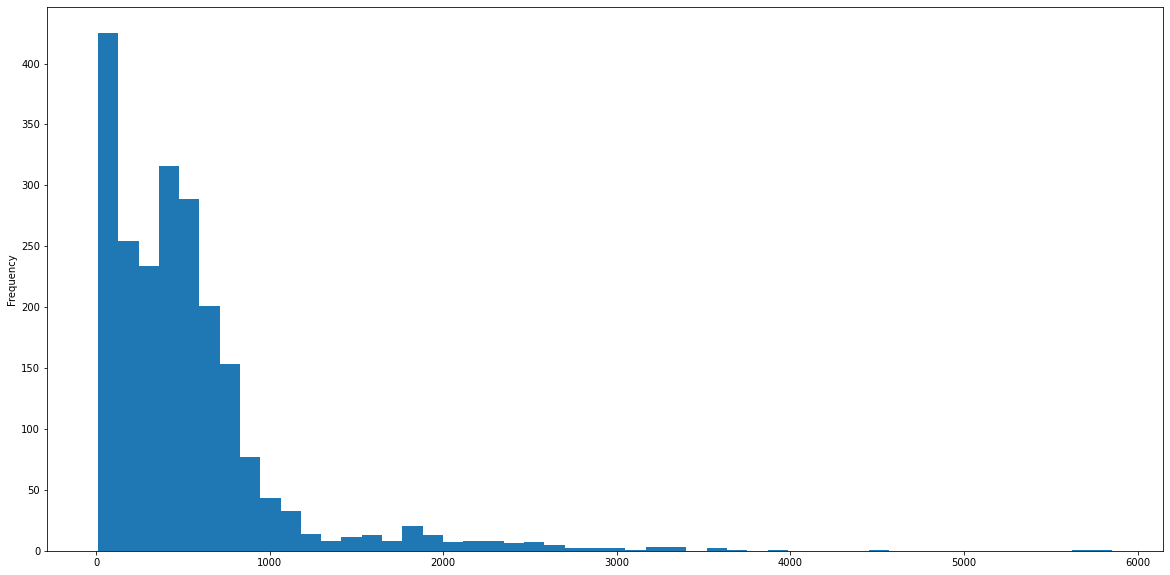

In [ ]:
nwsch["Total"].plot(kind = 'hist', bins=50, figsize=(20, 10))



# plt.hist(df['Total'], bins=500)
# plt.show()

# df.hist(grid=False, bins=range(0,55,5))
# plt.xlabel('Age of Players')
# plt.ylabel('# of Players')
# plt.title('Age Distribution')

<AxesSubplot:xlabel='SchoolEntityID'>

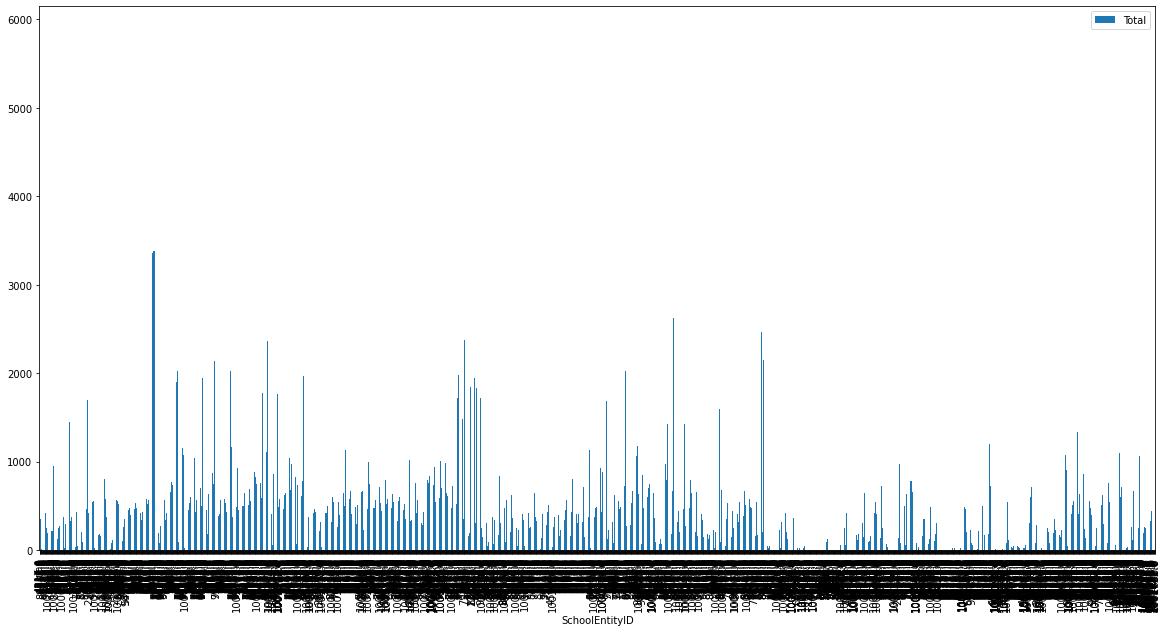

In [ ]:


nwsch.plot(x="SchoolEntityID", y="Total", kind="bar", figsize=(20, 10))

# Turn off tick labels
# ax.set_yticklabels([])
# ax.set_xticklabels([])



# ax1 = plt.axes()
# x_axis = ax1.xaxis
# x_axis.set_label_text('foo')
# x_axis.label.set_visible(False)